# ***We will train 3 types of logistic_models***

- Statistical ML Model
- Decision Tree Ensemble type logistic_model
- Neural Network Model

## Statistical Model

(221, 46)
Precision: 0.69
Recall: 0.30
F1 Score: 0.42
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       213
           1       0.69      0.30      0.42        37

    accuracy                           0.88       250
   macro avg       0.79      0.64      0.67       250
weighted avg       0.86      0.88      0.85       250



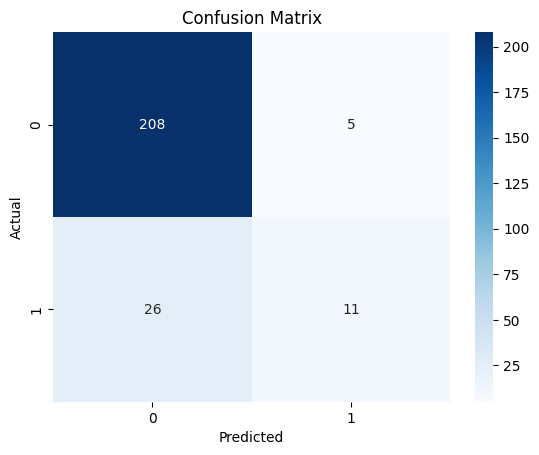

Training Score: 0.90
Validation Score: 0.88


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
train_df = pd.read_csv("../data/train_data.csv")
test_df = pd.read_csv("../data/test_data.csv")
cv_data = pd.read_csv("../data/cv_data.csv")

# Combine train and cv data for training
train_df = pd.concat([train_df, cv_data], axis=0)
print(test_df.shape)

# Specify the target and features
target = "Attrition"
features = train_df.columns.drop(target)

# Split the data into features and target
X = train_df[features]
y = train_df[target]
# print(y)
y = np.where(y == "Yes", 1, 0)
# print(y)


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = logistic_model.predict(X_val)

# Evaluate the model
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print(classification_report(y_val, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Check for generalization and bias
train_score = logistic_model.score(X_train, y_train)
val_score = logistic_model.score(X_val, y_val)

print(f"Training Score: {train_score:.2f}")
print(f"Validation Score: {val_score:.2f}")


Validation Precision: 0.45
Validation Recall: 0.38
Validation F1 Score: 0.41
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       213
           1       0.45      0.38      0.41        37

    accuracy                           0.84       250
   macro avg       0.67      0.65      0.66       250
weighted avg       0.83      0.84      0.83       250

Training Score: 0.94194
Validation Score: 0.85600


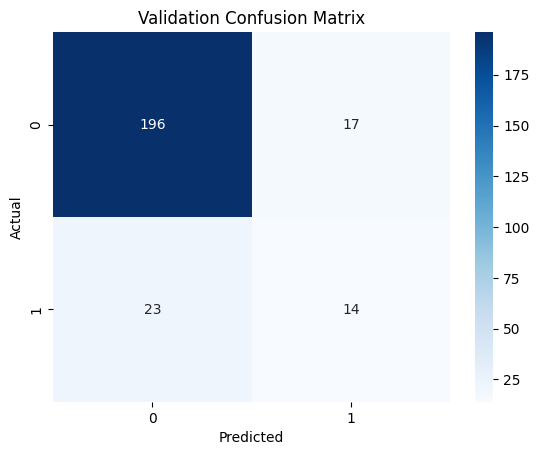

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns


def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    y_pred = (y_pred > 0.5).astype(int)
    return "f1", f1_score(y_true, y_pred)


# Combine train and cv data for training
train_df = pd.concat([train_df, cv_data, test_df], axis=0)

# Specify the target and features
target = "Attrition"
features = train_df.columns.drop(target)

# Split the data into features and target
X = train_df[features]
y = train_df[target]
y = np.where(y == "Yes", 1, 0)


# # Define the XGBoost model
# xgb_model = XGBClassifier(
#     use_label_encoder=False,
#     eval_metric=["auc", "logloss", "error"],
#     objective="binary:logistic",
# )

# # Define the hyperparameters grid
# param_distributions = {
#     "n_estimators": [200, 300],
#     "max_depth": [3],
#     "learning_rate": [0.2, 0.3, 0.4],
#     "subsample": [0.5, 0.7, 0.8],
#     "colsample_bytree": [0.5, 0.7, 0.8],
#     "gamma": [0.4, 0.5, 0.6],
#     "min_child_weight": [1],
#     "reg_alpha": [0.1, 0.5, 1, 3, 5],
#     "reg_lambda": [5, 10, 15, 20, 25],
# }

# # Perform hyperparameter tuning using RandomizedSearchCV
# random_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid =param_distributions,
#     scoring="f1",
#     cv=5,
#     n_jobs=-1,
# )

# random_search.fit(
#     X_train,
#     y_train,
#     verbose=False,
# )

# # Get the best hyperparameters
# best_params = random_search.best_params_
# print(f"Best Hyperparameters: {best_params}")

best_params = {
    "subsample": 0.7,
    "reg_lambda": 30,
    "reg_alpha": 2,
    "n_estimators": 300,
    "min_child_weight": 1,
    "max_depth": 3,
    "learning_rate": 0.3,
    "gamma": 0.6,
    "colsample_bytree": 0.8,
}


# Train the XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(
    **best_params,
    eval_metric=["auc", "logloss", "error"],
)
best_xgb_model.fit(
    X_train,
    y_train,
    verbose=False,
)

# Predict on the validation set
y_val_pred = best_xgb_model.predict_proba(X_val)[:, 1]
y_val_pred = np.where(y_val_pred > 0.3, 1, 0)

# Evaluate the model on the validation set
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Validation Precision: {precision:.2f}")
print(f"Validation Recall: {recall:.2f}")
print(f"Validation F1 Score: {f1:.2f}")

# Detailed classification report
print(classification_report(y_val, y_val_pred))

# Check for generalization and bias
train_score = best_xgb_model.score(X_train, y_train)
val_score = best_xgb_model.score(X_val, y_val)

# if abs(train_score - val_score) < 0.05:
#     print("The model generalizes well.")
# else:
#     print("The model may be overfitting or under-fitting")

print(f"Training Score: {train_score:.5f}")
print(f"Validation Score: {val_score:.5f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Confusion Matrix")
plt.show()

<Figure size 2000x1200 with 0 Axes>

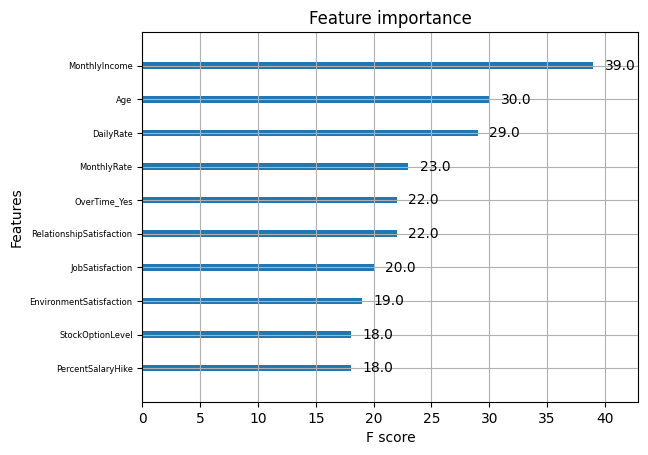

In [3]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming best_xgb_model is your trained XGBoost model
booster = best_xgb_model.get_booster()


# Set the figure size
plt.figure(figsize=(20, 12))  # Adjust the width and height as needed

# Plot feature importance with adjusted font size
ax = xgb.plot_importance(best_xgb_model, max_num_features=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)  # Adjust the font size as needed
plt.show()

In [5]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

# Define a custom F1 score function
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping



def f1_score_tensors(y_true, y_pred):
    y_true = K.cast(y_true, "float32")
    y_pred = K.round(K.cast(y_pred, "float32"))
    tp = K.sum(K.cast(y_true * y_pred, "float32"), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, "float32"), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), "float32"), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2 * p * r / (p + r + K.epsilon())
    return K.mean(f1)


# Assuming X and y are already defined and preprocessed
# X = ... (features)
# y = ... (target)

# Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=20,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

# Define a function to create the MLP model
def create_model(
    hidden_layer_sizes=(100,),
    activation="relu",
    optimizer="adam",
    dropout_rate=0.0,
    l2_reg=0.0,
):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(
        Dense(
            hidden_layer_sizes[0],
            activation=activation,
            kernel_regularizer=l2(l2_reg),
        )
    )
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    for units in hidden_layer_sizes[1:]:
        model.add(Dense(units, activation=activation, kernel_regularizer=l2(l2_reg)))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=[
            "accuracy",
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall(),
            tf.keras.metrics.AUC(),
            f1_score_tensors,
        ],
    )
    return model


# # Wrap the model using KerasClassifier
# model = KerasClassifier(
#     model=create_model,
#     hidden_layer_sizes=(100,),
#     activation="relu",
#     optimizer="adam",
#     dropout_rate=0.0,
#     l2_reg=0.0,
#     callbacks=[early_stopping], 
#     verbose=0,
# )

# # Define the hyperparameters grid
# param_distributions = {
#     "hidden_layer_sizes": [(200, 100, 50), (300, 200, 100, 50), (500, 300, 100, 50)],
#     "activation": ["relu"],
#     "optimizer": ["adam"],
#     "dropout_rate": [0.0, 0.1, 0.2],
#     "batch_size": [64, 128],
#     "epochs": [500,1000],
#     "l2_reg": [0.02, 0.025, 0.03, 0.035, 0.04],
# }

# # Perform hyperparameter tuning using RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_distributions,
#     n_iter=50,
#     scoring="f1",
#     cv=5,
#     random_state=42,
#     n_jobs=-1,
# )

# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_


# Get the best hyperparameters
best_params = {
    "optimizer": "adam",
    "l2_reg": 0.0135,
    "hidden_layer_sizes": (50, 250, 500, 1000, 500, 250, 50),
    "epochs": 10000,
    "dropout_rate": 0.2,
    "batch_size": 100,
    "activation": "relu",
}



print(f"Best Hyperparameters: {best_params}")

# Train the MLP model with the best hyperparameters
best_mlp_model = create_model(
    hidden_layer_sizes=best_params["hidden_layer_sizes"],
    activation=best_params["activation"],
    optimizer=best_params["optimizer"],
    dropout_rate=best_params["dropout_rate"],
    l2_reg=best_params["l2_reg"],
)
history = best_mlp_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    callbacks=[early_stopping], 
    verbose=0,
)


Best Hyperparameters: {'optimizer': 'adam', 'l2_reg': 0.0135, 'hidden_layer_sizes': (50, 250, 500, 1000, 500, 250, 50), 'epochs': 10000, 'dropout_rate': 0.2, 'batch_size': 100, 'activation': 'relu'}


In [13]:
best_mlp_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │         2,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 250)            │        12,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 500)            │       125,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1000)           │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │        12,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,839,705 (14.65 MB)

 Trainable params: 1,279,901 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,559,804 (9.76 MB)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Validation Precision: 0.42
Validation Recall: 0.41
Validation F1 Score: 0.41
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       213
           1       0.42      0.41      0.41        37

    accuracy                           0.83       250
   macro avg       0.66      0.65      0.66       250
weighted avg       0.83      0.83      0.83       250



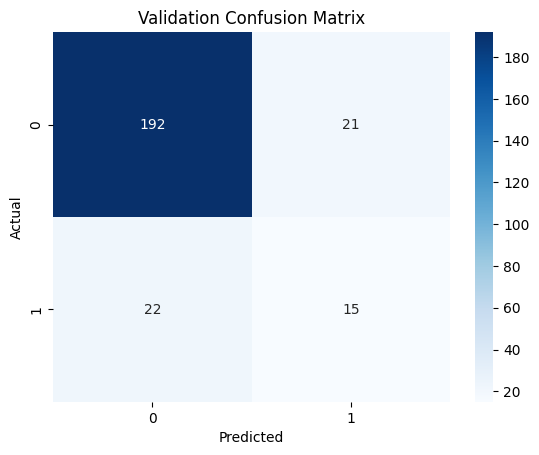

Training Score: 0.44
Validation Score: 0.16
The model may be overfitting or under-fitting


In [14]:
# Predict on the validation set
y_val_pred = np.where(best_mlp_model.predict(X_val) > 0.3, 1, 0)


# Evaluate the model on the validation set
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Validation Precision: {precision:.2f}")
print(f"Validation Recall: {recall:.2f}")
print(f"Validation F1 Score: {f1:.2f}")

# Detailed classification report
print(classification_report(y_val, y_val_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Confusion Matrix")
plt.show()

# Check for generalization and bias
train_score = best_mlp_model.evaluate(X_train, y_train, verbose=0)[3]
val_score = best_mlp_model.evaluate(X_val, y_val, verbose=0)[3]

print(f"Training Score: {train_score:.2f}")
print(f"Validation Score: {val_score:.2f}")

if abs(train_score - val_score) < 0.03:
    print("The model generalizes well.")
else:
    print("The model may be overfitting or under-fitting")

In [15]:
default_xg_boost = XGBClassifier(
    eval_metric=["auc", "logloss", "error"],
)
default_xg_boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['auc', 'logloss', 'error'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


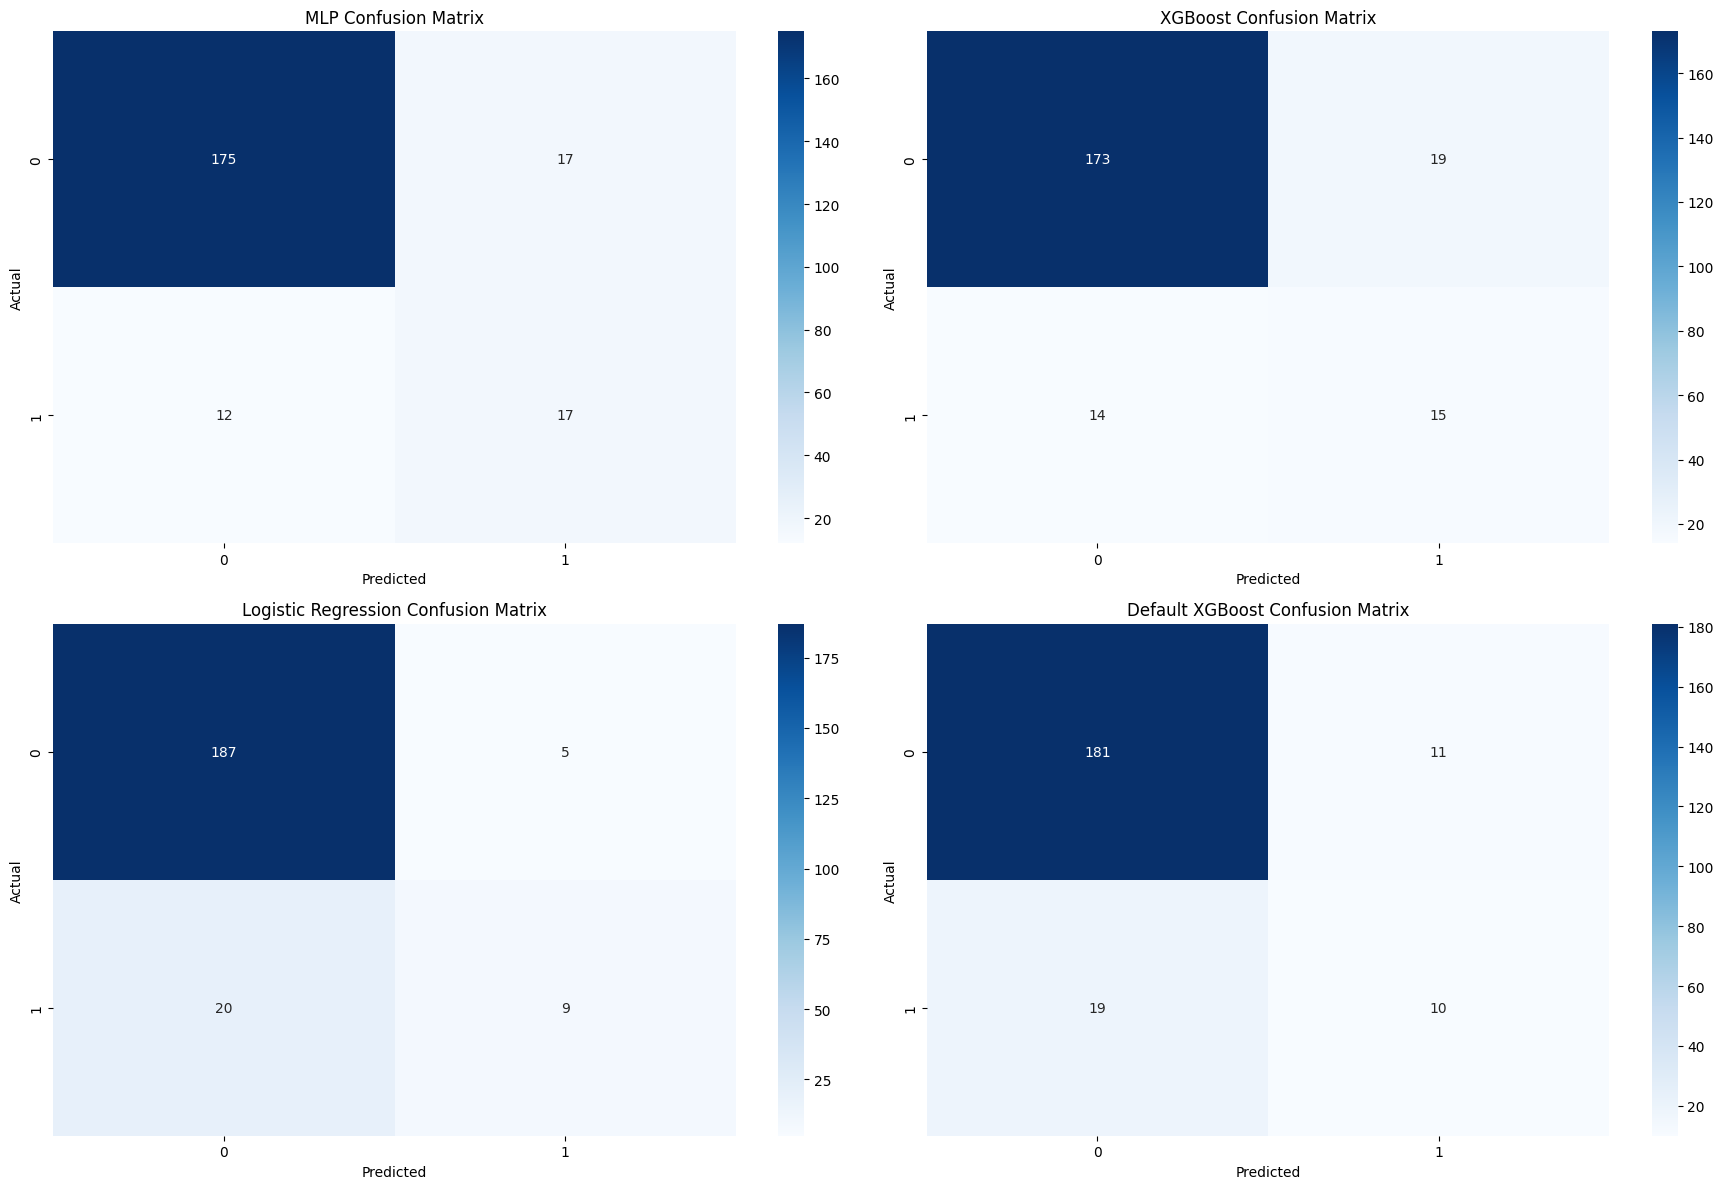

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Figure size 1200x800 with 0 Axes>

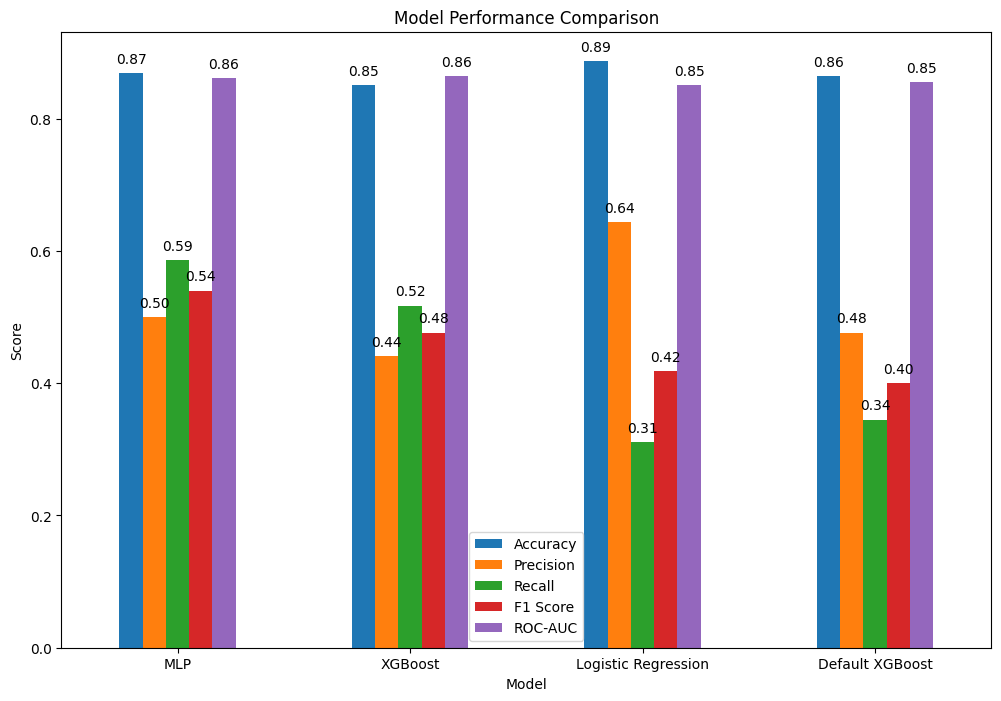

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


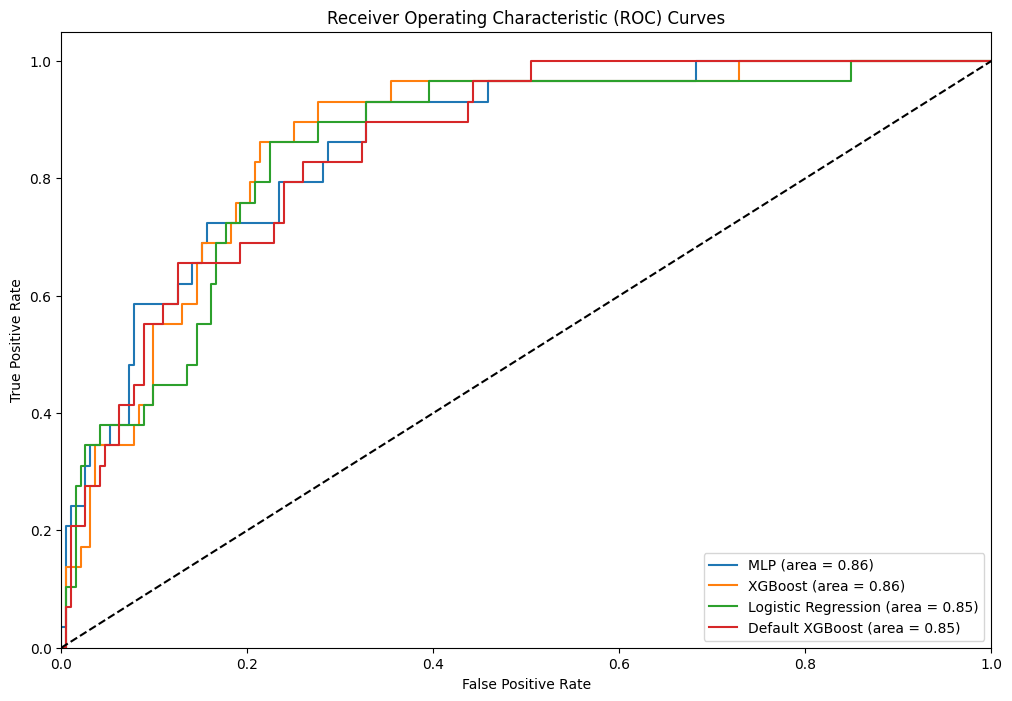

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


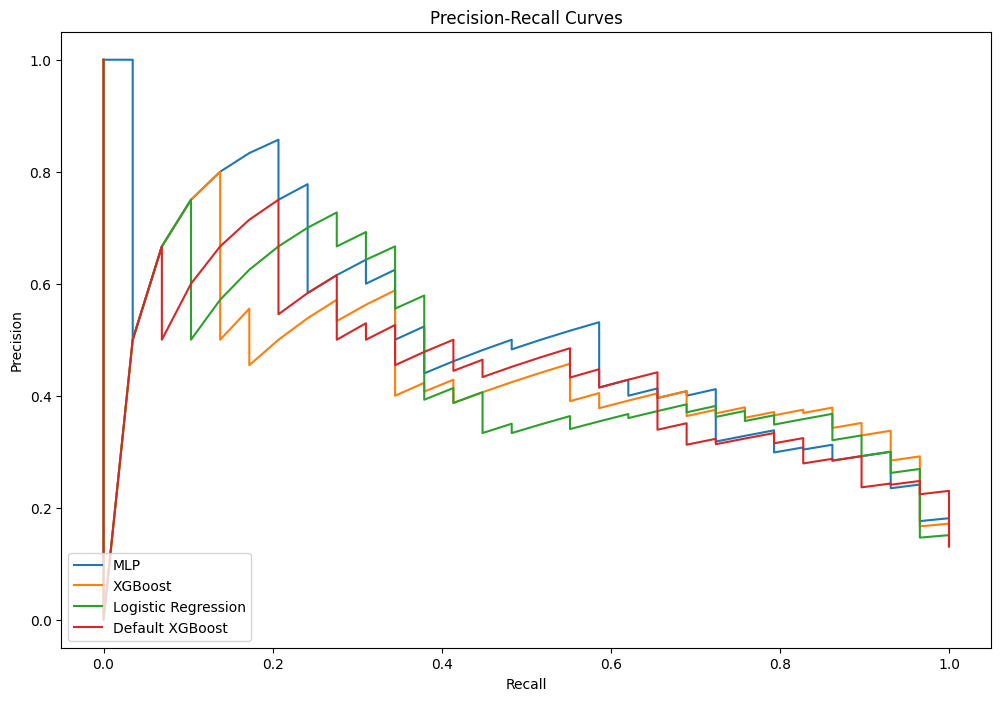

In [16]:


# Prepare the test data
X_test = test_df.drop(columns=["Attrition"])
y_test = test_df["Attrition"]
y_test = np.where(y_test == "Yes", 1, 0)

# Predict on the test set using each model
y_test_pred_mlp = np.where(best_mlp_model.predict(X_test) > 0.3, 1, 0)
y_test_pred_xgb = np.where(best_xgb_model.predict_proba(X_test)[:, 1] > 0.3, 1, 0)
y_test_pred_logreg = logistic_model.predict(X_test)
y_test_pred_default_xgb = np.where(default_xg_boost.predict_proba(X_test)[:, 1] > 0.3, 1, 0)

# Plot Confusion Matrix for each model
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Define model names and predictions
model_names = ["MLP", "XGBoost", "Logistic Regression", "Default XGBoost"]
predictions = [y_test_pred_mlp, y_test_pred_xgb, y_test_pred_logreg, y_test_pred_default_xgb]

# Plot confusion matrices
for ax, model_name, y_pred in zip(axes, model_names, predictions):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Calculate metrics for each model
metrics = {
    "Model": ["MLP", "XGBoost", "Logistic Regression", "Default XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_test_pred_mlp),
        accuracy_score(y_test, y_test_pred_xgb),
        accuracy_score(y_test, y_test_pred_logreg),
        accuracy_score(y_test, y_test_pred_default_xgb),
    ],
    "Precision": [
        precision_score(y_test, y_test_pred_mlp),
        precision_score(y_test, y_test_pred_xgb),
        precision_score(y_test, y_test_pred_logreg),
        precision_score(y_test, y_test_pred_default_xgb),
    ],
    "Recall": [
        recall_score(y_test, y_test_pred_mlp),
        recall_score(y_test, y_test_pred_xgb),
        recall_score(y_test, y_test_pred_logreg),
        recall_score(y_test, y_test_pred_default_xgb),
    ],
    "F1 Score": [
        f1_score(y_test, y_test_pred_mlp),
        f1_score(y_test, y_test_pred_xgb),
        f1_score(y_test, y_test_pred_logreg),
        f1_score(y_test, y_test_pred_default_xgb),
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, best_mlp_model.predict(X_test)),
        roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, default_xg_boost.predict_proba(X_test)[:, 1]),
    ],
}

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(12, 8))
ax = metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 8))

# Annotate the bars with the values
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.show()

# Plot ROC curves
plt.figure(figsize=(12, 8))
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, best_mlp_model.predict(X_test))
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
fpr_default_xgb, tpr_default_xgb, _ = roc_curve(y_test, default_xg_boost.predict_proba(X_test)[:, 1])

plt.plot(fpr_mlp, tpr_mlp, label="MLP (area = {:.2f})".format(metrics["ROC-AUC"][0]))
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (area = {:.2f})".format(metrics["ROC-AUC"][1]))
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression (area = {:.2f})".format(metrics["ROC-AUC"][2]))
plt.plot(fpr_default_xgb, tpr_default_xgb, label="Default XGBoost (area = {:.2f})".format(metrics["ROC-AUC"][3]))

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import precision_recall_curve
# Calculate precision-recall pairs for each model
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, best_mlp_model.predict(X_test))
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
precision_default_xgb, recall_default_xgb, _ = precision_recall_curve(y_test, default_xg_boost.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curves
plt.figure(figsize=(12, 8))
plt.plot(recall_mlp, precision_mlp, label="MLP")
plt.plot(recall_xgb, precision_xgb, label="XGBoost")
plt.plot(recall_logreg, precision_logreg, label="Logistic Regression")
plt.plot(recall_default_xgb, precision_default_xgb, label="Default XGBoost")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend(loc="lower left")
plt.show()